In [34]:
# test connect
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# phase 1: Exploratory Data Analysis

In [3]:
# read data
# note to up and ruru : change path before run it
mushroom = pd.read_csv('/Users/yifanwang/Desktop/DSCI550/550project/mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

From this quick overview, we can see:
1. There is no null value in the entire dataset.
2. All variables are categorical variable.
3. ......

In [16]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


<AxesSubplot: xlabel='class', ylabel='count'>

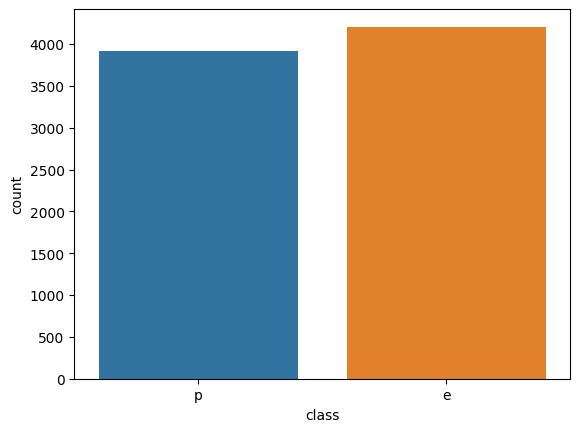

In [19]:
sns.countplot(data = mushroom, x = 'class')

The ratio of poisonous and edible mushroom is about 1:1

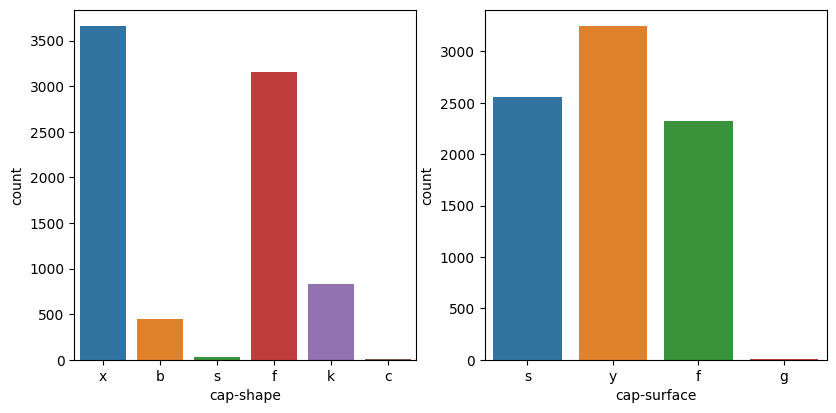

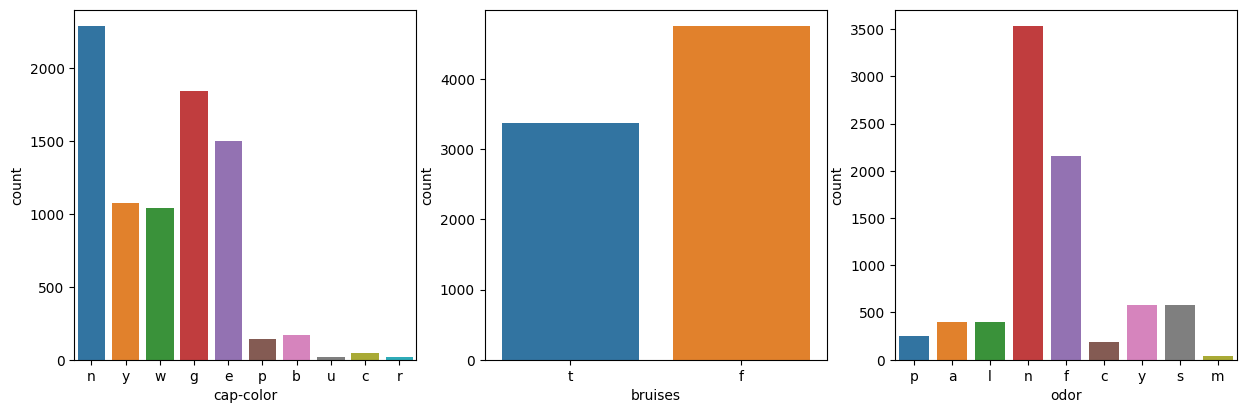

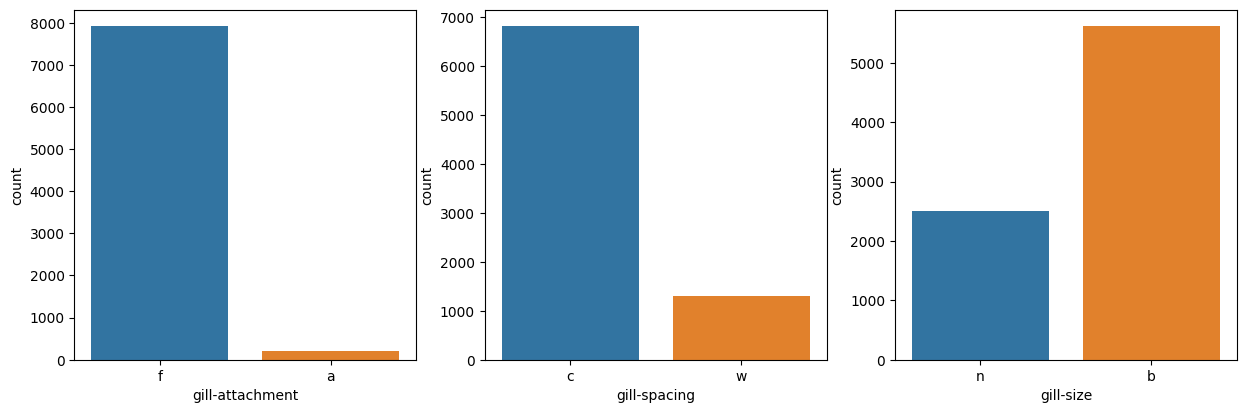

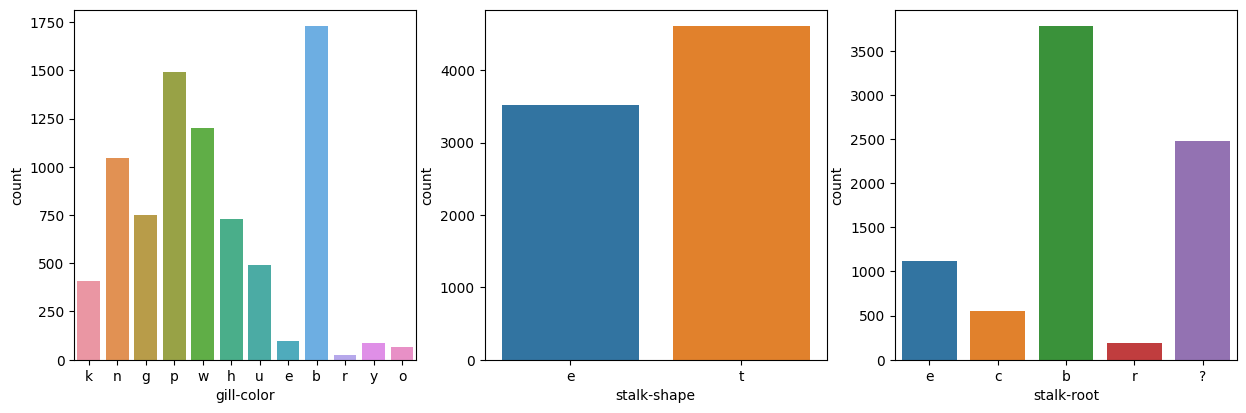

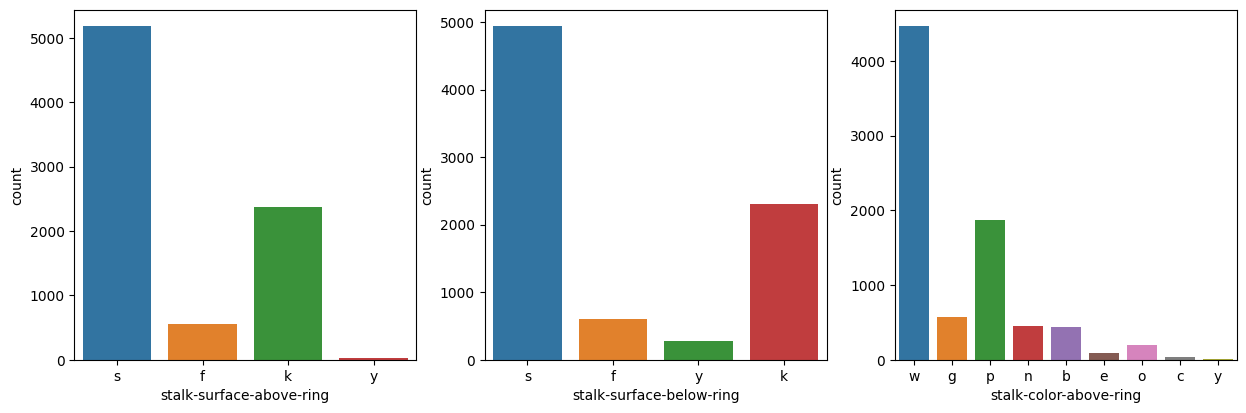

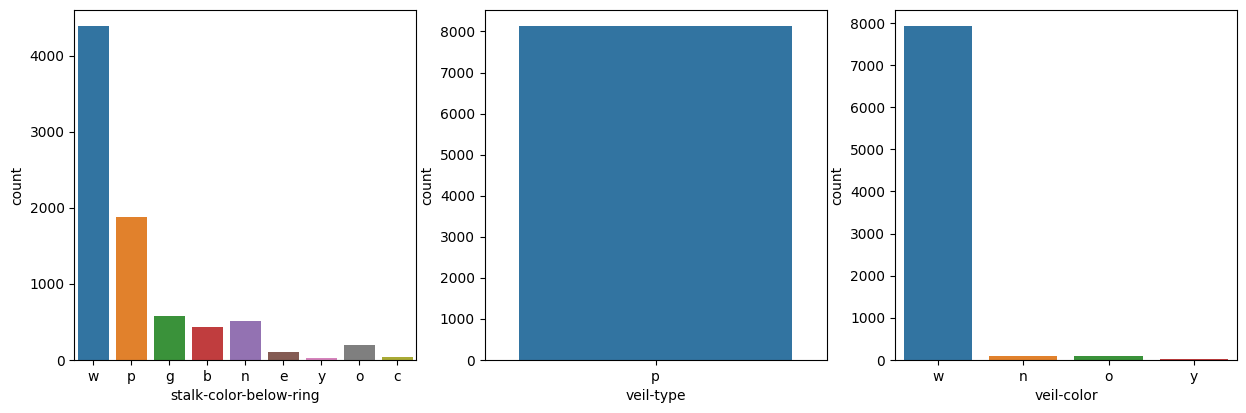

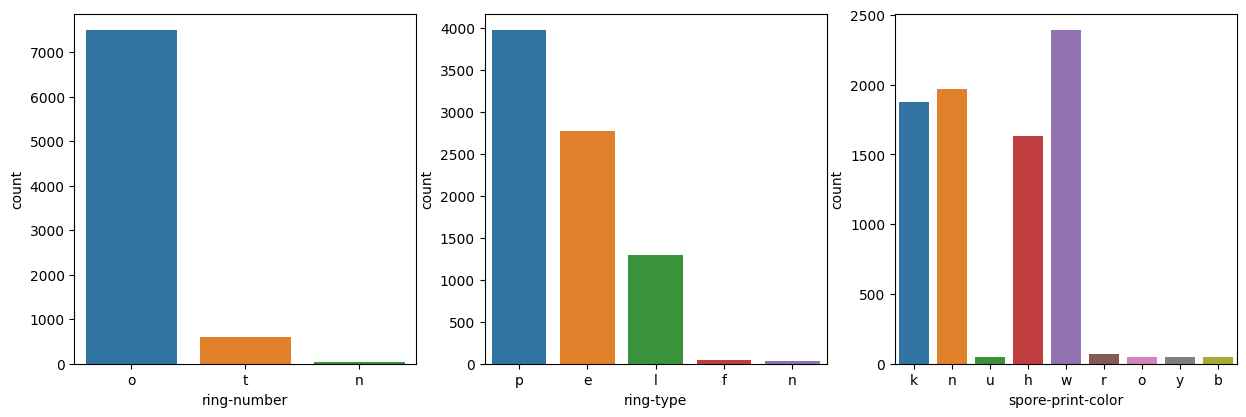

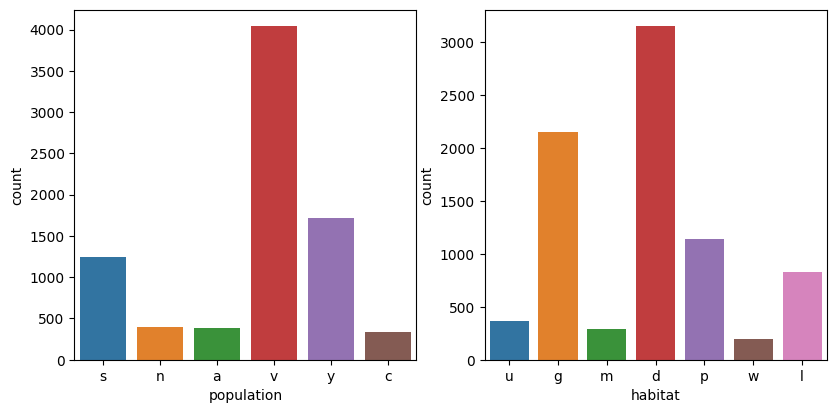

In [27]:
# draw countplot to see the frequency of each cat variables.
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(mushroom.columns):
    if ix <= 3:
        if c != 'class':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = mushroom, x=c, ax = ax1)
    ix = ix +1
    if ix == 4:
        fig = plt.figure(figsize = (15,10))
        ix =1

# phase 2: machine learning models

## 2.1 Decision Tree

In [33]:
# split dataset in features and target variable
# features
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
            'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
            'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
            'stalk-surface-below-ring', 'stalk-color-above-ring',
            'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
            'ring-type', 'spore-print-color', 'population', 'habitat']
X = mushroom[features]
# target variable
y = mushroom['class']

In [35]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 2.1.1 Catboost

Use catboost package to do the decision tree model first.
The advantage of the package is it can deal with categorical variables easily.

In [49]:
import catboost
cbc = catboost.CatBoostClassifier(random_seed=0, loss_function=None)
cbc.fit(X_train, y_train, cat_features = list(X_train.columns))

Learning rate set to 0.021639
0:	learn: 0.6362644	total: 19.2ms	remaining: 19.2s
1:	learn: 0.5814129	total: 43.4ms	remaining: 21.6s
2:	learn: 0.5330156	total: 54.3ms	remaining: 18.1s
3:	learn: 0.4901635	total: 70.8ms	remaining: 17.6s
4:	learn: 0.4516339	total: 128ms	remaining: 25.4s
5:	learn: 0.4146539	total: 151ms	remaining: 25s
6:	learn: 0.3831535	total: 162ms	remaining: 22.9s
7:	learn: 0.3551525	total: 177ms	remaining: 21.9s
8:	learn: 0.3242526	total: 208ms	remaining: 22.9s
9:	learn: 0.3014048	total: 224ms	remaining: 22.1s
10:	learn: 0.2850261	total: 234ms	remaining: 21s
11:	learn: 0.2643300	total: 267ms	remaining: 22s
12:	learn: 0.2426909	total: 292ms	remaining: 22.1s
13:	learn: 0.2297347	total: 301ms	remaining: 21.2s
14:	learn: 0.2171413	total: 310ms	remaining: 20.4s
15:	learn: 0.1942192	total: 346ms	remaining: 21.3s
16:	learn: 0.1739172	total: 365ms	remaining: 21.1s
17:	learn: 0.1559210	total: 391ms	remaining: 21.3s
18:	learn: 0.1401947	total: 426ms	remaining: 22s
19:	learn: 0.12

In [50]:
prd = pd.DataFrame({'predict':cbc.predict(X_test), 'test':y_test})
prd.head(40)

,predict,test
1392,e,e
4051,p,p
3725,p,p
7177,p,p
103,e,e
3371,p,p
6738,p,p
1525,e,e
5838,p,p
4299,p,p


In [51]:
correct = 0
for i in range(prd.shape[0]):
    if prd.iloc[i,0] == prd.iloc[i,1]:
        correct+= 1
accuarcy = correct/prd.shape[0]
accuarcy

1.0

### 2.1.2 DecisionTreeClassifier()
##### transfrom categorical variables to numerical variables use sklearn.preprocessing.LabelEncoder

In [84]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
mushroom_encode = mushroom
for i in mushroom_encode.columns:
    mushroom_encode[i]=encoder.fit_transform(mushroom_encode[i])
mushroom_encode.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
X_encode = mushroom_encode[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                            'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                            'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                            'stalk-surface-below-ring', 'stalk-color-above-ring',
                            'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                            'ring-type', 'spore-print-color', 'population', 'habitat']]
y_encode = mushroom_encode['class']

use sklearn.preprocessing.StandardScaler
Standardize features by removing the mean and scaling to unit variance.

In [89]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_encode_sc=sc.fit_transform(X_encode)

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [90]:
# Split dataset into training set and test set
# 70% training and 30% test7
X_train_encode, X_test_encode, y_train_encode, y_test_encode = train_test_split(X_encode_sc, y_encode, test_size=0.3, random_state=2)

In [91]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_encode,y_train_encode)

#Predict the response for test dataset
y_pred = clf.predict(X_test_encode)

In [92]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_encode, y_pred))

Accuracy: 1.0
